<a href="https://colab.research.google.com/github/basukala/Rice-Leaf-Disease-Prediction/blob/main/Liver_Patient_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries/Packages

In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read csv Data

In [11]:
data=pd.read_csv("/content/drive/MyDrive/dataset/indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
data.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

### Check shape of Dataset

In [13]:
data.shape

(583, 11)

### Check statistical Information

In [14]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Check Datatypes

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Check for duplicated data

In [16]:
data.duplicated().sum()

13

In [17]:
# Selecting duplicate rows except first 
# occurrence based on all columns
dup_rows = data[data.duplicated()]
dup_rows

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [18]:
#drop 13 duplicated rows except for the first occurrence 
data.drop_duplicates(keep='first',inplace=True) 

In [19]:
data.duplicated().sum()

0

In [20]:
data.shape

(570, 11)

### Check for null values

In [21]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [22]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [23]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [24]:
data.Dataset.value_counts()

1    406
2    164
Name: Dataset, dtype: int64

In [25]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [26]:
X=data.iloc[:,:-1]
y=data.Dataset

### Balance the target variable

In [27]:
oversampling=RandomOverSampler()
X, y= oversampling.fit_resample(X, y)
type(X)

pandas.core.frame.DataFrame

In [28]:
new_data=pd.DataFrame(data=X, columns=X.columns)
new_data["Dataset"]=y
new_data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
807,69,Female,0.8,0.2,146,42,70,8.4,4.9,1.40,2
808,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
809,18,Female,0.8,0.2,199,34,31,6.5,3.5,1.16,2
810,11,Male,0.7,0.1,592,26,29,7.1,4.2,1.40,2


In [29]:
new_data["Dataset"].value_counts()

1    406
2    406
Name: Dataset, dtype: int64

In [30]:
numerical_data =new_data.select_dtypes(exclude=['object']).copy()
numerical_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [31]:
categorical_data =new_data.select_dtypes(include=['object']).copy()
categorical_data.head()

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male


### Univariate Analysis of Numerical Features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


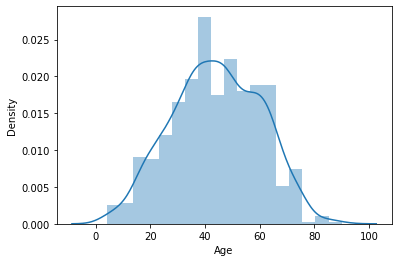

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


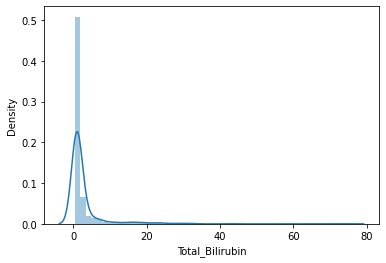

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


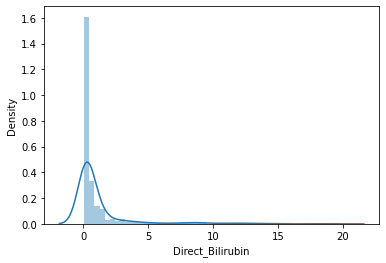

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


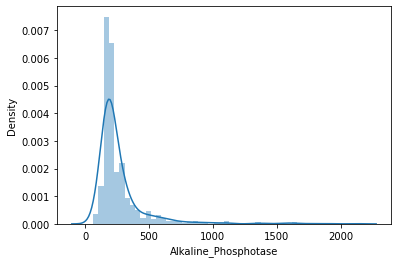

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


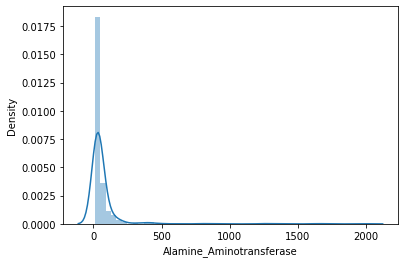

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


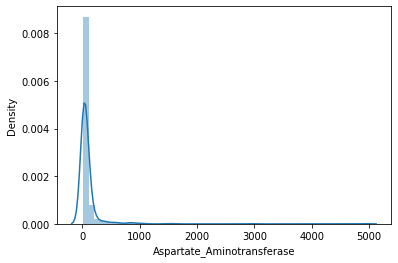

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


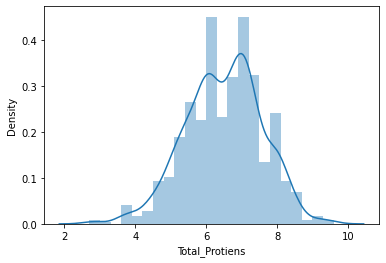

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


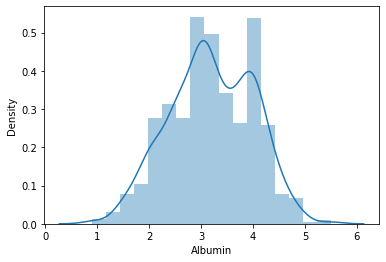

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


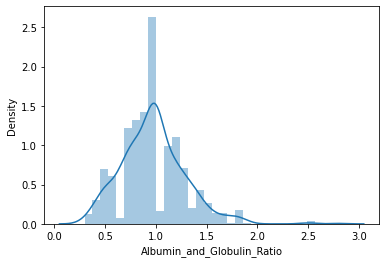

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


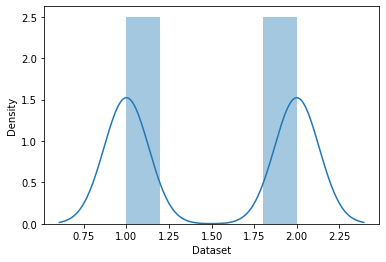

In [32]:
for i,k in numerical_data.iteritems():
    sns.distplot(numerical_data[i].dropna(axis=0))
    plt.show()
   

### Find out the relationship between numerical variable and dependent variable

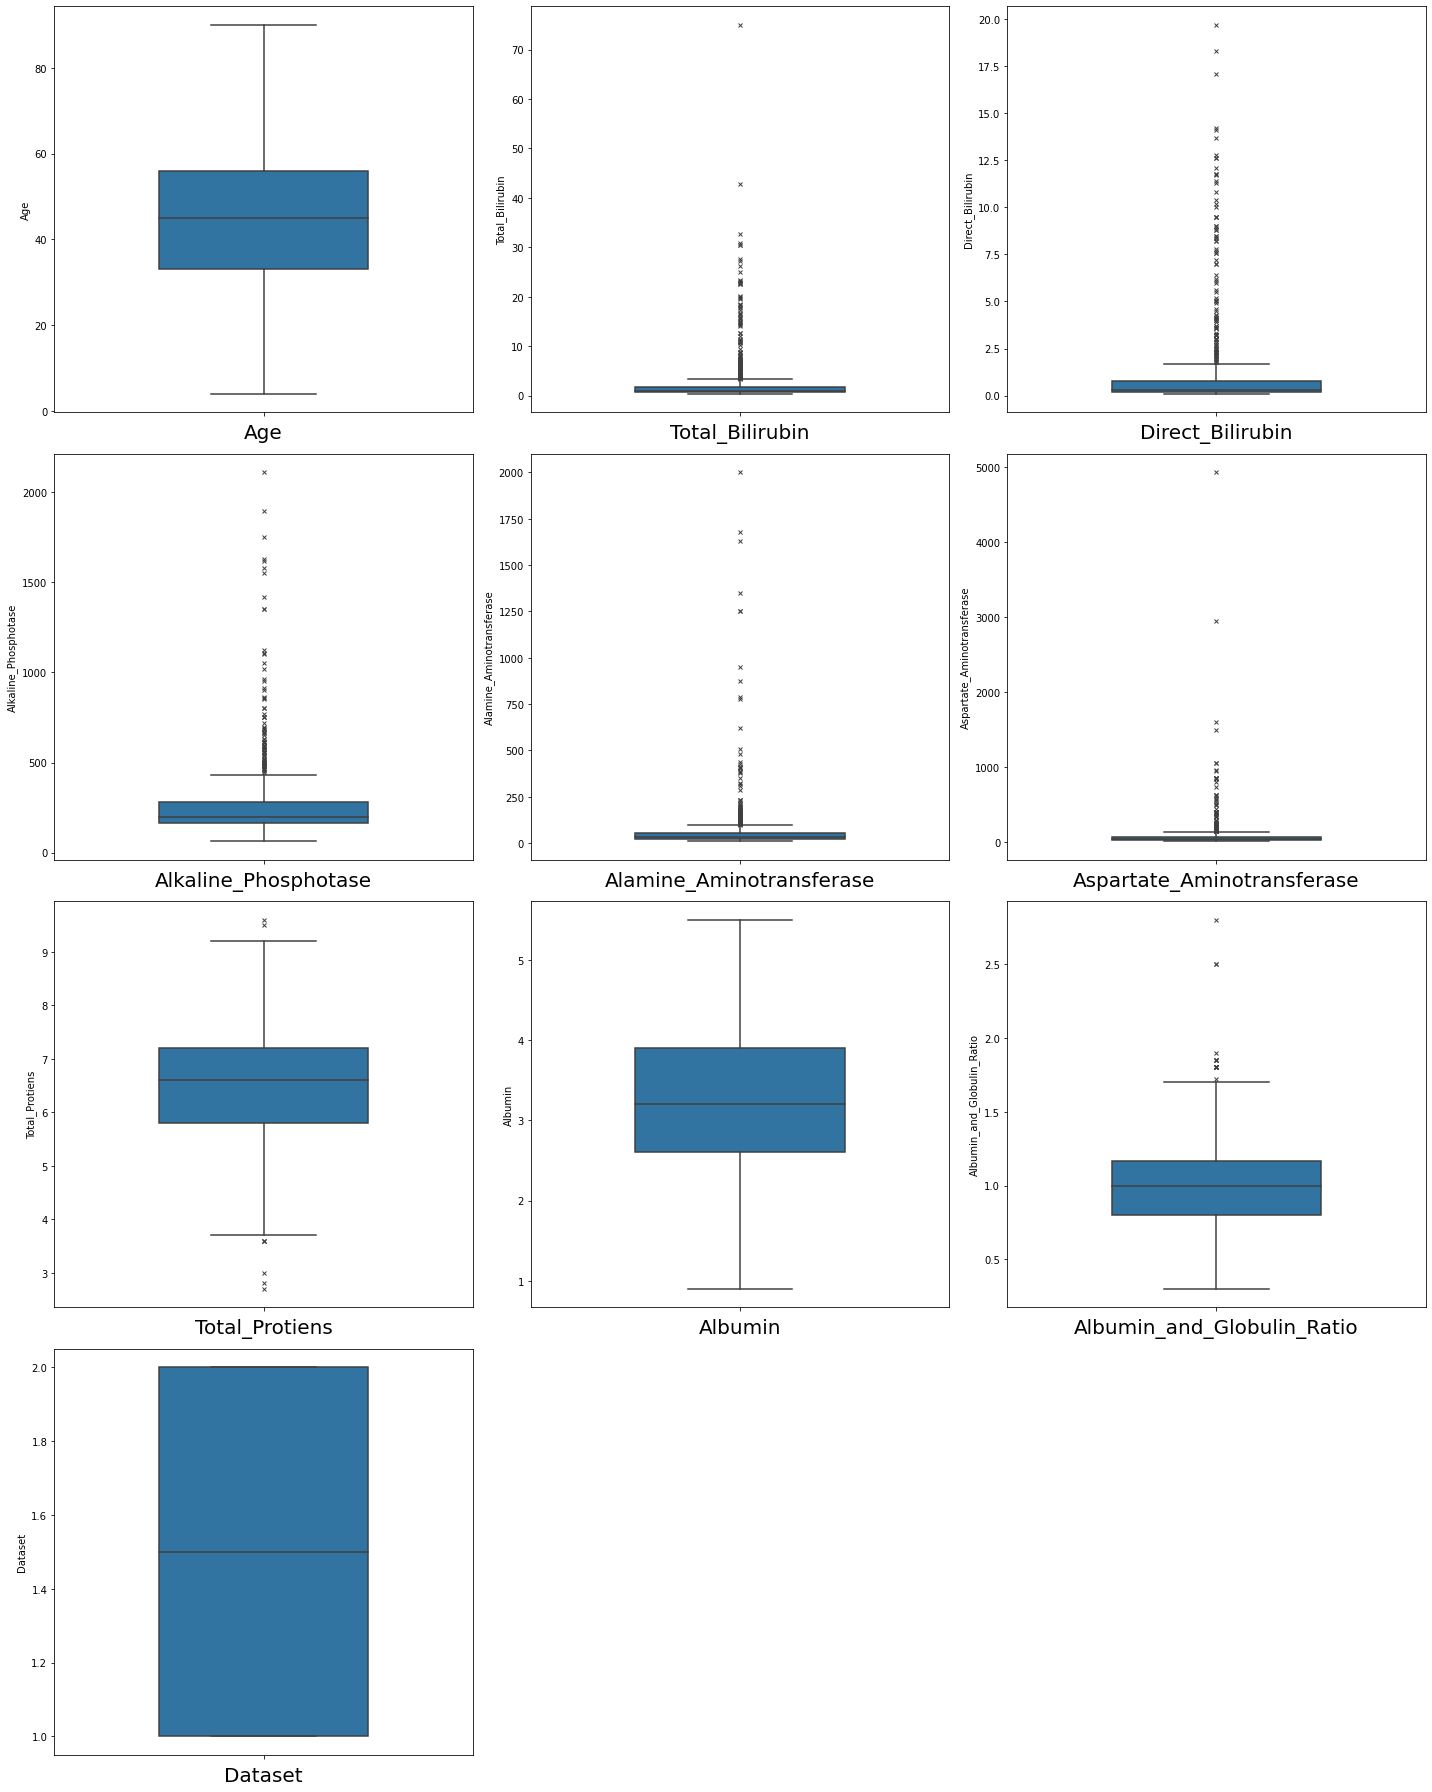

In [33]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in numerical_data:
    if plotnumber<=10:
        ax = plt.subplot(4,3,plotnumber) # rows,columns,current plot
        sns.boxplot(data = numerical_data, y = numerical_data[col], width= 0.5, flierprops = dict(marker = "x", markersize = 3.5))
        plt.xlabel(col,fontsize=20)
        #plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Univariate Analysis for Categorical Feature

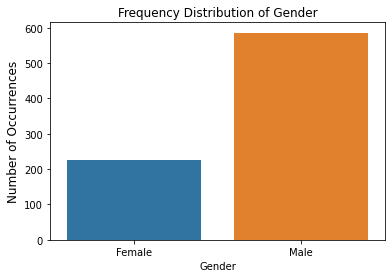

In [34]:
sns.countplot(x=categorical_data['Gender']);
plt.title('Frequency Distribution of Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

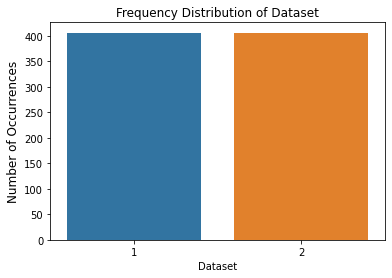

In [35]:
sns.countplot(x=numerical_data['Dataset']);
plt.title('Frequency Distribution of Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [36]:
categorical_data["Gender"].value_counts()

Male      586
Female    226
Name: Gender, dtype: int64

#### Categorical to Numerical Conversion

In [37]:
le=LabelEncoder()
categorical_data['Gender']=le.fit_transform(categorical_data['Gender'])

In [38]:
target_map={1:0,2:1}
numerical_data['Dataset']=numerical_data['Dataset'].map(target_map)

In [39]:
finalData=pd.concat([categorical_data,numerical_data], axis=1)
finalData

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
807,0,69,0.8,0.2,146,42,70,8.4,4.9,1.40,1
808,1,60,0.5,0.1,500,20,34,5.9,1.6,0.37,1
809,0,18,0.8,0.2,199,34,31,6.5,3.5,1.16,1
810,1,11,0.7,0.1,592,26,29,7.1,4.2,1.40,1


### Correlation with target variable

In [40]:
print(finalData.corrwith(finalData['Dataset'],axis=0))

Gender                       -0.120906
Age                          -0.132089
Total_Bilirubin              -0.293444
Direct_Bilirubin             -0.325974
Alkaline_Phosphotase         -0.256186
Alamine_Aminotransferase     -0.210994
Aspartate_Aminotransferase   -0.198387
Total_Protiens                0.016949
Albumin                       0.166051
Albumin_and_Globulin_Ratio    0.196924
Dataset                       1.000000
dtype: float64


In [41]:
finalData.isnull().sum().any()

False

In [42]:
finalData.head()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [43]:
X=finalData.drop(['Dataset'],axis=1)
y=finalData.Dataset

In [44]:
liver_corr = X.corr()
liver_corr

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Gender,1.000000,0.034193,0.099917,0.112656,0.016315,0.081618,0.086404,-0.076956,-0.091089,-0.016630
Age,0.034193,1.000000,0.021141,0.019224,0.046416,-0.065270,-0.007380,-0.199260,-0.243587,-0.168755
Total_Bilirubin,0.099917,0.021141,1.000000,0.879643,0.231977,0.237720,0.257800,-0.006962,-0.202046,-0.199127
Direct_Bilirubin,0.112656,0.019224,0.879643,1.000000,0.261542,0.258576,0.278324,-0.000753,-0.209417,-0.196868
Alkaline_Phosphotase,0.016315,0.046416,0.231977,0.261542,1.000000,0.148219,0.184776,-0.013429,-0.155507,-0.232999
Alamine_Aminotransferase,0.081618,-0.065270,0.237720,0.258576,0.148219,1.000000,0.793976,-0.019257,-0.024716,-0.016293
Aspartate_Aminotransferase,0.086404,-0.007380,0.257800,0.278324,0.184776,0.793976,1.000000,-0.018509,-0.081866,-0.076544
Total_Protiens,-0.076956,-0.199260,-0.006962,-0.000753,-0.013429,-0.019257,-0.018509,1.000000,0.802556,0.271759
Albumin,-0.091089,-0.243587,-0.202046,-0.209417,-0.155507,-0.024716,-0.081866,0.802556,1.000000,0.714594
Albumin_and_Globulin_Ratio,-0.016630,-0.168755,-0.199127,-0.196868,-0.232999,-0.016293,-0.076544,0.271759,0.714594,1.000000


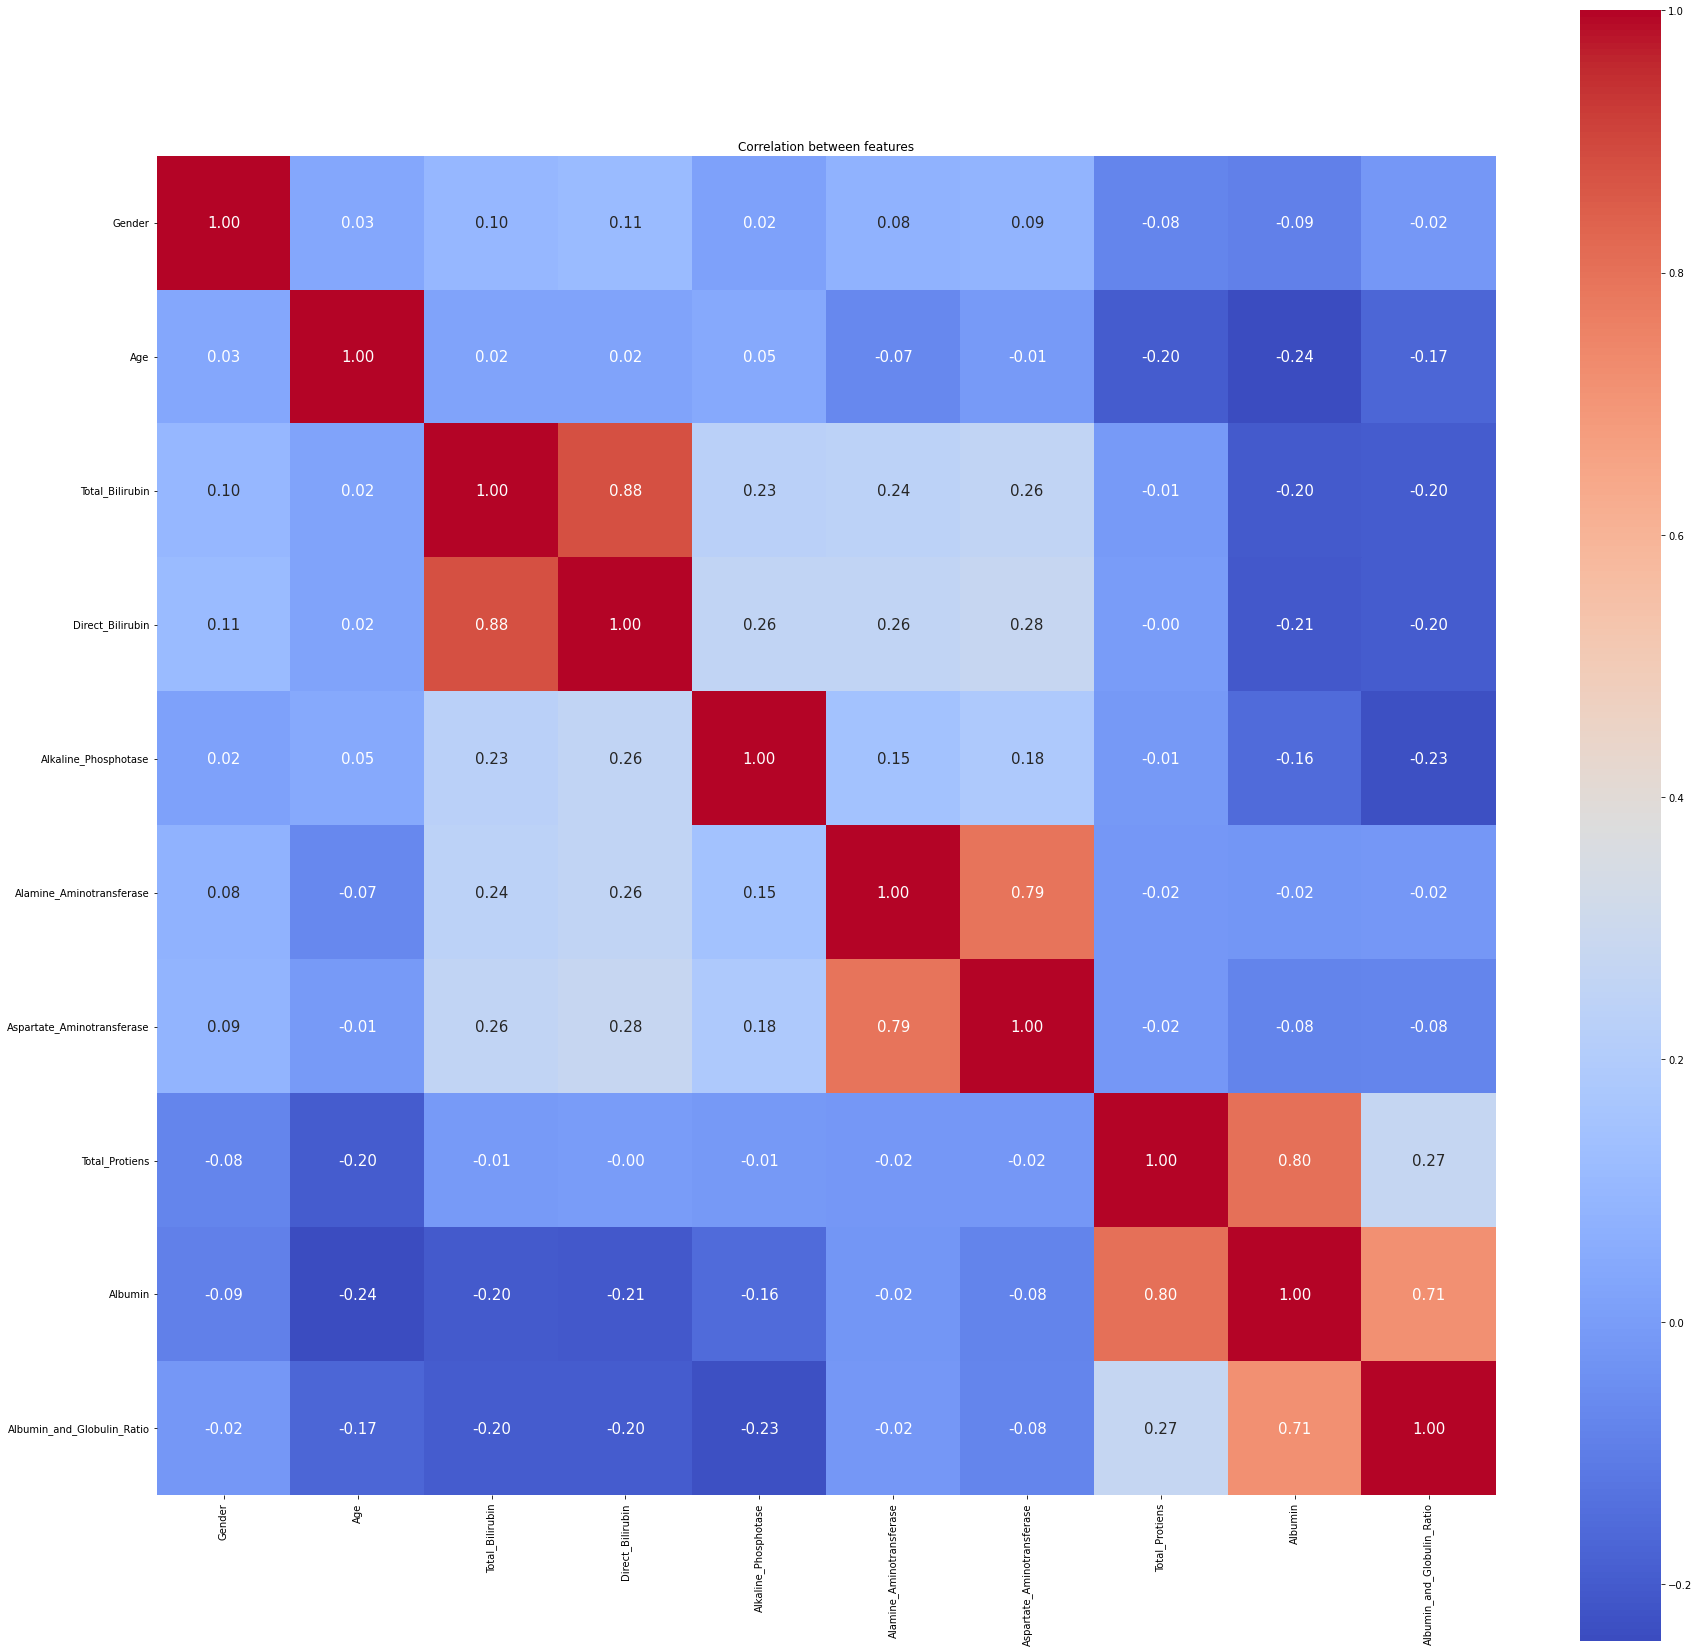

In [45]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

### Split into train and test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,random_state=20, stratify = y) # 80% training 20% testing data

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(649, 10)
(163, 10)
(649,)
(163,)


### Model Implementation

In [48]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_predict=model_rf.predict(X_test)
print('Training Score:',model_rf.score(X_train, y_train))
print('Testing Score:',model_rf.score(X_test, y_test))
print('Accuracy Score:',accuracy_score(y_test,y_predict))
print("Classification Report:\n ",classification_report(y_test,y_predict))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Training Score: 1.0
Testing Score: 0.8343558282208589
Accuracy Score: 0.8343558282208589
Classification Report:
                precision    recall  f1-score   support

           0       0.92      0.73      0.81        81
           1       0.78      0.94      0.85        82

    accuracy                           0.83       163
   macro avg       0.85      0.83      0.83       163
weighted avg       0.85      0.83      0.83       163

Confusion Matrix:
 [[59 22]
 [ 5 77]]


In [49]:
X_test.head()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
110,1,32,12.7,6.2,194,2000,2946,5.7,3.3,1.30
478,1,27,1.0,0.3,180,56,111,6.8,3.9,1.85
194,1,40,3.9,1.7,350,950,1500,6.7,3.8,1.30
745,1,33,0.8,0.2,135,30,29,7.2,4.4,1.50
213,1,26,1.3,0.4,173,38,62,8.0,4.0,1.00


In [50]:
y_test

110    0
478    1
194    0
745    1
213    0
      ..
37     0
751    1
506    0
591    1
189    1
Name: Dataset, Length: 163, dtype: int64

In [51]:
X.Gender.value_counts() #0->male,1->female

1    586
0    226
Name: Gender, dtype: int64

In [52]:
y_predict=model_rf.predict([[1,65,0.7,0.1,187,16,18,6.8,3.3,0.9]])
y_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [53]:
y_predict=model_rf.predict([[0,17,0.9,0.3,202,22,19,7.4,4.1,1.2]])
y_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [54]:
y_pred=model_rf.predict([[1,84,0.7,0.2,188,13,21,6,3.2,1.1]])
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [55]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
y_predict_lr=model_lr.predict(X_test)
print('Training Score:',model_lr.score(X_train, y_train))
print('Testing Score:',model_lr.score(X_test, y_test))
print('Accuracy Score:',accuracy_score(y_test,y_predict_lr))
print("Classification Report:\n ",classification_report(y_test,y_predict_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict_lr))


Training Score: 0.7257318952234206
Testing Score: 0.6993865030674846
Accuracy Score: 0.6993865030674846
Classification Report:
                precision    recall  f1-score   support

           0       0.78      0.56      0.65        81
           1       0.66      0.84      0.74        82

    accuracy                           0.70       163
   macro avg       0.72      0.70      0.69       163
weighted avg       0.72      0.70      0.69       163

Confusion Matrix:
 [[45 36]
 [13 69]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
model_kn = KNeighborsClassifier()
model_kn.fit(X_train,y_train)
y_predict=model_kn.predict(X_test)
print('Training Score:',model_kn.score(X_train, y_train))
print('Testing Score:',model_kn.score(X_test, y_test))
print('Accuracy Score:',accuracy_score(y_test,y_predict))
print("Classification Report:\n ",classification_report(y_test,y_predict))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Training Score: 0.7889060092449923
Testing Score: 0.6748466257668712
Accuracy Score: 0.6748466257668712
Classification Report:
                precision    recall  f1-score   support

           0       0.70      0.60      0.65        81
           1       0.66      0.74      0.70        82

    accuracy                           0.67       163
   macro avg       0.68      0.67      0.67       163
weighted avg       0.68      0.67      0.67       163

Confusion Matrix:
 [[49 32]
 [21 61]]


In [57]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predict = svc_model.predict(X_test)# check performance
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 Score:',f1_score(y_test, svc_predict))

Accuracy score: 0.6748466257668712
F1 Score: 0.7309644670050761


In [58]:
model_xg=XGBClassifier()
model_xg.fit(X_train,y_train)
y_predict = model_xg.predict(X_test)# check performance
print('Accuracy score:',accuracy_score(y_test, y_predict))



Accuracy score: 0.754601226993865


In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is ",score)
print("Report card of this model")
print(classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score ", accuracy_score(y_test,y_pred_dtree))

Score of the model is  0.8220858895705522
Report card of this model
              precision    recall  f1-score   support

           0      0.933     0.691     0.794        81
           1      0.757     0.951     0.843        82

    accuracy                          0.822       163
   macro avg      0.845     0.821     0.819       163
weighted avg      0.845     0.822     0.819       163

Accuracy score  0.8220858895705522


### HYperparameter Tuning For XGBoost


In [60]:
params={
    "learning_rate":[0.05,0.1,0.15],
    "max_depth":[5,7,8,9],
    "min_child_weight":[2,3,4],
    "gamma":[0.2,0.3,0.4,0.5],
    'n_estimators':[100,200,300],
}

In [61]:
xg_model=XGBClassifier(use_label_encoder=False)

In [62]:
from sklearn.model_selection import GridSearchCV
gridSearch=GridSearchCV(xg_model,params,n_jobs=5,cv=5,verbose=3)

In [63]:
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=XGBClassifier(use_label_encoder=False), n_jobs=5,
             param_grid={'gamma': [0.2, 0.3, 0.4, 0.5],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [5, 7, 8, 9],
                         'min_child_weight': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [64]:
print(gridSearch.best_score_)
print(gridSearch.best_params_)

0.8059272510435299
{'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200}


In [65]:
classifier=XGBClassifier(gamma=0.3, learning_rate=0.1,max_depth=9, min_child_weight=2,n_estimators=100)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

[[58 23]
 [ 3 79]]
0.8404907975460123


### Hyperparameter Tuning for SVC

In [75]:
model_svc=SVC()

In [76]:
param_grid = {'C': [1,2,3],
              'gamma': [0.02,0.03,0.04],
              'kernel': ['rbf']}
 
grid = GridSearchCV(model_svc, param_grid, refit = True,cv=5 ,verbose = 3)
 
# fitting the model for grid search
grid.fit(X, y)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.914 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.944 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.951 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.975 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.810 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.902 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.969 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.981 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.994 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.04, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.04, kernel=rbf;,

In [77]:
model_svr=SVC(C=2,gamma=0.02,kernel='rbf')
model_svr.fit(X_train,y_train)
y_predict_test_svr=model_svr.predict(X_test)
y_predict_train_svr=model_svr.predict(X_train)
print("Train accuracy ",accuracy_score(y_train,y_predict_train_svr))
print("Test accuracy ",accuracy_score(y_test,y_predict_test_svr))

Train accuracy  0.9953775038520801
Test accuracy  0.9141104294478528


In [78]:
y_predict=model_svr.predict([[1,65,0.7,0.1,187,16,18,6.8,3.3,0.9]])
y_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [79]:
y_pred=model_rf.predict([[1,84,0.7,0.2,188,13,21,6,3.2,1.1]])
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

### Hyperparameter Tuning for RandomForestClassifier

In [71]:
model_rfc=RandomForestClassifier()

In [72]:
param_grid = {'max_depth': [2,3,4,5],
              'min_samples_split': [2, 5, 10],
              'n_estimators':[100,200,300],
              'max_features': ['auto', 'sqrt', 'log2']
             }
 
grid = GridSearchCV(model_rfc, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.677 total time=   0.2s
[CV 2/5] END max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.669 total time=   0.2s
[CV 3/5] END max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.800 total time=   0.2s
[CV 4/5] END max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.677 total time=   0.2s
[CV 5/5] END max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.775 total time=   0.2s
[CV 1/5] END max_depth=2, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.677 total time=   0.4s
[CV 2/5] END max_depth=2, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.662 total time=   0.3s
[CV 3/5] END max_depth=2, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.808 total time=   0.4s
[CV 4/5] 

In [73]:
model_rf=RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=200)
model_rf.fit(X_train,y_train)
y_predict_test_rf=model_rf.predict(X_test)
y_predict_train_rf=model_rf.predict(X_train)
print("Train accuracy ",accuracy_score(y_train,y_predict_train_rf))
print("Test accuracy ",accuracy_score(y_test,y_predict_test_rf))

Train accuracy  0.8366718027734977
Test accuracy  0.7852760736196319


## There is a problem of overfitting in first stage of the model.Later try to minimize this problem using RandomOverSampler for balancing Target Feature and  hyperparameter tuning.Got a better accuracy in support vector classifier model so we selected this model.The accuracy we got after hyperparameter tuning in SVC is 91.41%
